In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
rest_data=pd.read_csv('zomato_restaurants.csv')


In [9]:
rest_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
rest_data.shape

(51717, 17)

In [11]:
rest_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### 1.Total Number of Restaurants

In [14]:
len(rest_data['name'].unique())

8792

#### 2.Restaurant with Online Order Option

In [16]:
rest_data['online_order'].value_counts()/rest_data.shape[0]*100

online_order
Yes    58.866524
No     41.133476
Name: count, dtype: float64

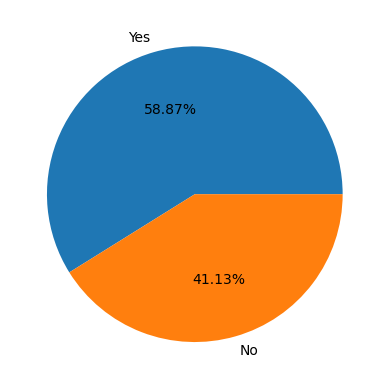

In [17]:
plt.pie(rest_data['online_order'].value_counts(),autopct="%0.2f%%",labels=rest_data['online_order'].unique())
plt.show()

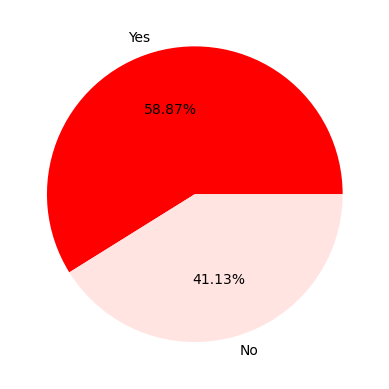

In [18]:
plt.pie(rest_data['online_order'].value_counts(),autopct="%0.2f%%",
        labels=rest_data['online_order'].unique(),
       colors=['red','mistyrose'])
plt.show()

#### 3.Restaurant with Online Book Table Option

In [20]:
rest_data['book_table'].value_counts()/rest_data.shape[0]*100

book_table
No     87.530213
Yes    12.469787
Name: count, dtype: float64

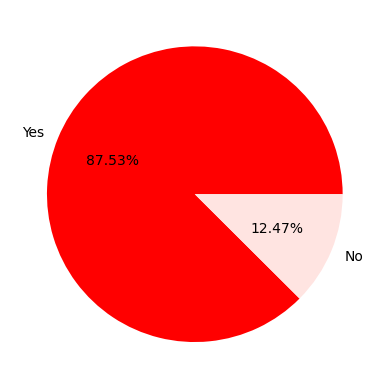

In [21]:
plt.pie(rest_data['book_table'].value_counts(),autopct="%0.2f%%",labels=['Yes','No'],colors=['red','mistyrose'])
plt.show()

#### 4.Famous Chains in Banglore

In [23]:
rest_data['name'].value_counts().sort_values(ascending=False)[:21]

name
Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Pizza Hut            62
Sweet Truth          60
Beijing Bites        60
Subway               60
KFC                  60
Domino's Pizza       60
Smoor                59
McDonald's           59
Chai Point           58
Faasos               57
Lassi Shop           56
Name: count, dtype: int64

In [24]:
names = rest_data['name'].value_counts().sort_values(ascending=False)[:21].index  #to get the values

In [25]:
rest_count = rest_data['name'].value_counts().sort_values(ascending=False)[:21].values 

Text(0.5, 1.0, 'Famous Chains in Banglore')

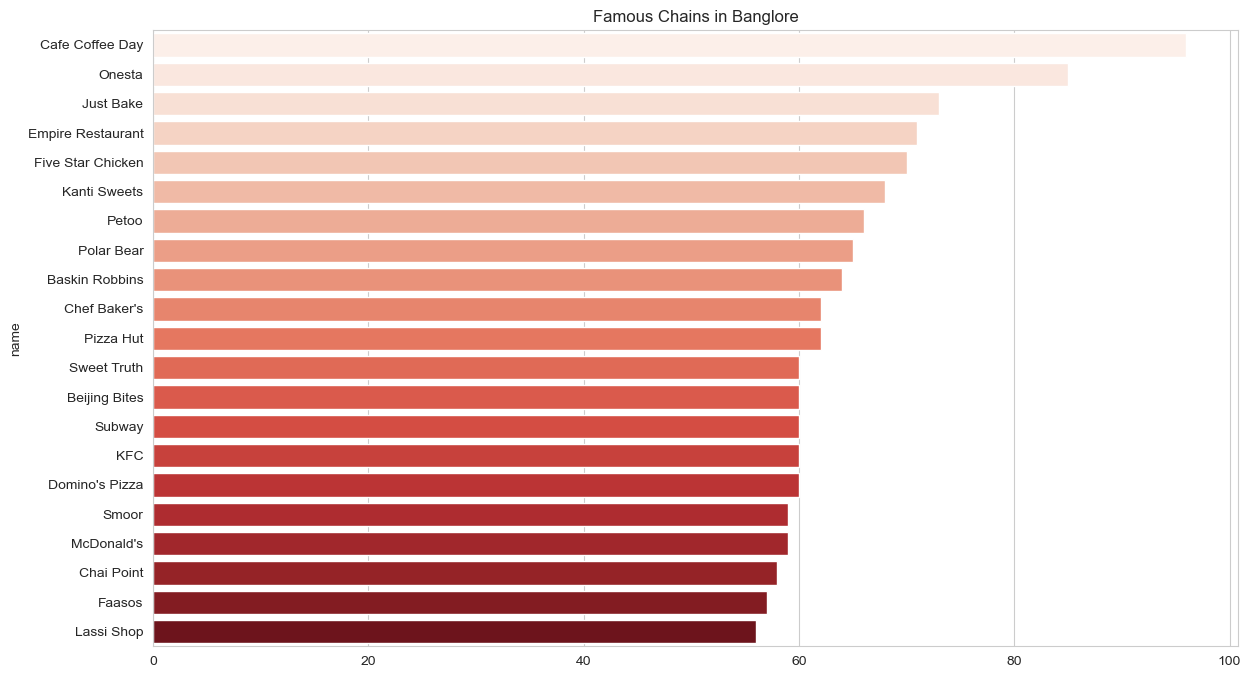

In [26]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.barplot(x=rest_count,y=names,orient='h',hue=names,palette='Reds')
plt.title("Famous Chains in Banglore")

#### 5.Find Most Popular Restaurant Types in Bengaluru

In [28]:
rest_type = rest_data['rest_type'].value_counts().sort_values(ascending=False)[:21].index

In [29]:
rest_type_count = rest_data['rest_type'].value_counts().sort_values(ascending=False)[:21].values

Text(0.5, 1.0, 'Popular Restaurant Types')

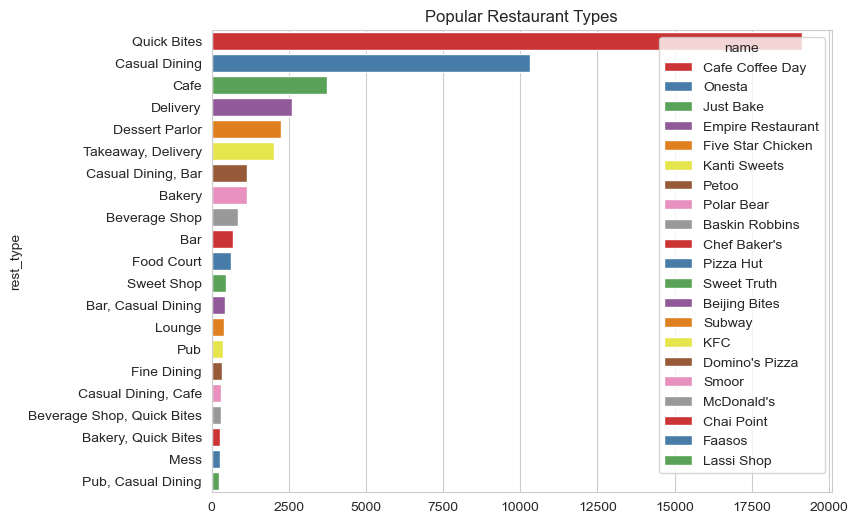

In [30]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x=rest_type_count,y=rest_type,orient='h',hue=names,palette='Set1')
plt.title("Popular Restaurant Types")

* Most popular restaurant type in Bengaluru is QuickBites

#### 6.Find Least Popular Restaurant Types in Bengaluru

In [33]:
rest_data['rest_type'].value_counts().sort_values(ascending=True)[:21]
least_rest_type = rest_data['rest_type'].value_counts().sort_values(ascending=True)[:21].index

In [34]:
least_rest_type_count = rest_data['rest_type'].value_counts().sort_values(ascending=True)[:21].values

Text(0.5, 1.0, 'Least Popular Restaurant Types')

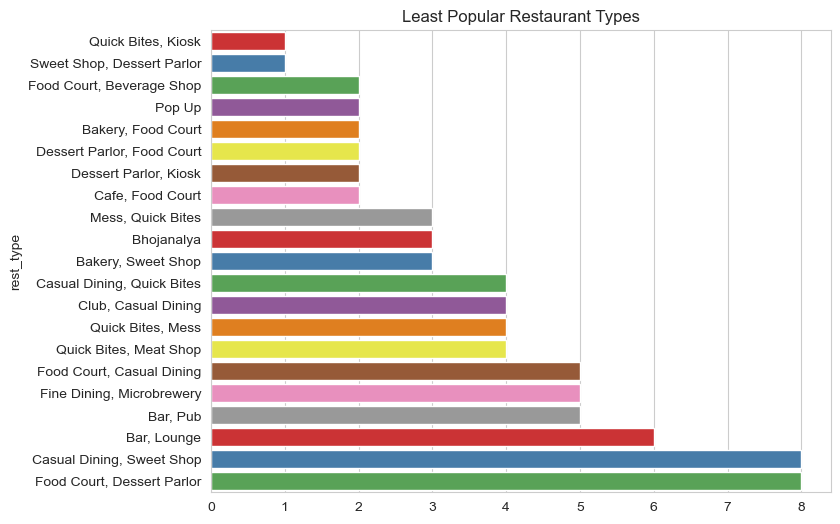

In [35]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x=least_rest_type_count,y=least_rest_type,orient='h',hue=least_rest_type,palette='Set1')
plt.title("Least Popular Restaurant Types")

#### 7.Distribution of Restaurant Cost(2 People)

In [37]:
rest_data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [38]:
#rest_data['approx_cost(for two people)'].replace(',','',regex=True).astype('float64')
rest_data['approx_cost(for two people)'] = rest_data['approx_cost(for two people)'].str.replace(',','').astype('float64')

#### 8.Check if it is skewed?

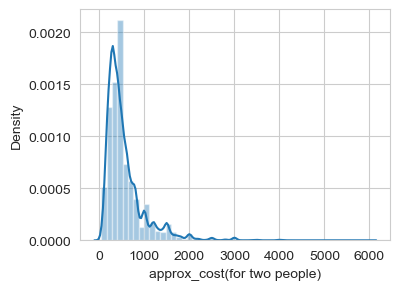

In [40]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (4,3))
sns.set_style('whitegrid')
sns.distplot(rest_data['approx_cost(for two people)'])
plt.show()

* Yes,the approx cost for two persons is skewed towards positive.Hence Positive Skewness

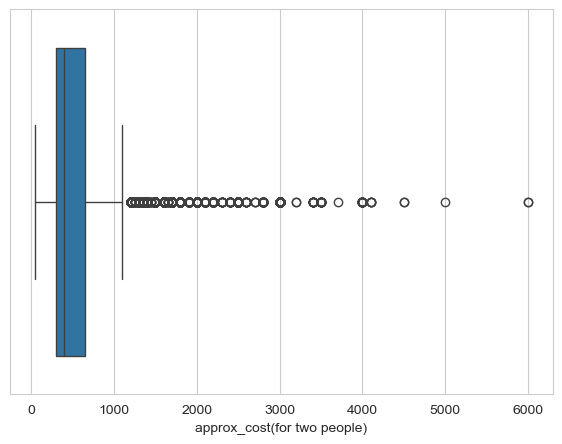

In [42]:
plt.figure(figsize = (7,5))
sns.boxplot(rest_data['approx_cost(for two people)'],orient='h')
plt.show()

In [43]:
rest_data['approx_cost(for two people)'].median()

400.0

In [44]:
#first quantile Q1
Q1 = rest_data['approx_cost(for two people)'].quantile(0.25)
Q2 = rest_data['approx_cost(for two people)'].quantile(0.5)
Q3 = rest_data['approx_cost(for two people)'].quantile(0.75)
print("First Quartile: ",Q1,"\nMedian: ",Q2,"\nThird Quartile: ",Q3)

First Quartile:  300.0 
Median:  400.0 
Third Quartile:  650.0


In [45]:
IQR = Q3-Q1
print("Inter Quartile Range of Cost for Two people: ",IQR)

Inter Quartile Range of Cost for Two people:  350.0


* The approx cost of two people range from Rs.300 to Rs.650, with the median cost approx to Rs.400.Yes,the approx cost for two persons is skewed towards positive.Hence Positive Skewness

#### 9.Which are the Top 20 locations with Most Number of Restaurants ? 

In [48]:
rest_data['listed_in(city)'].value_counts().sort_values(ascending=True)[:21]


listed_in(city)
New BEL Road          740
Banashankari          863
Rajajinagar          1079
Malleshwaram         1096
Frazer Town          1185
Bellandur            1227
Electronic City      1229
Sarjapur Road        1261
Basavanagudi         1266
Kalyan Nagar         1309
Kammanahalli         1329
Old Airport Road     1425
Brookefield          1518
Bannerghatta Road    1617
Whitefield           1620
Residency Road       1620
Marathahalli         1659
HSR                  1741
Lavelle Road         1744
Brigade Road         1769
MG Road              1811
Name: count, dtype: int64

In [49]:
city = rest_data['listed_in(city)'].value_counts().sort_values(ascending=False)[:21].index
city_count = rest_data['listed_in(city)'].value_counts().sort_values(ascending=False)[:21]

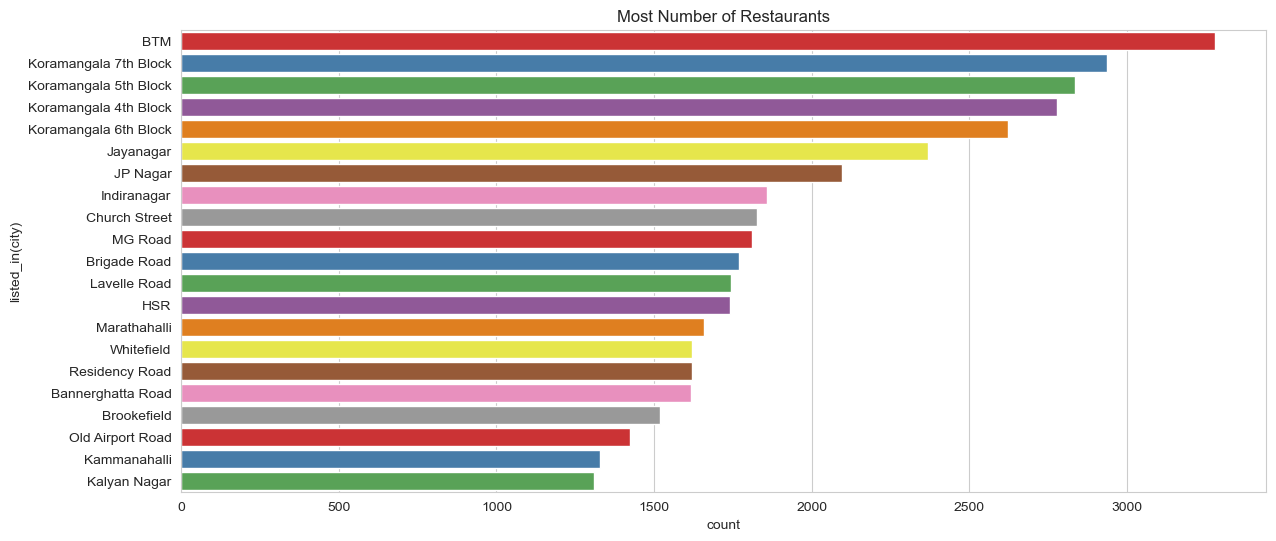

In [50]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.barplot(x=city_count,y=city,orient='h',hue=city,palette='Set1')
plt.title("Most Number of Restaurants")
plt.show()

* The Most Popular Places in Bengaluru with most number of restaurant are - BTM Layout,Koramangala

#### 10.Most Popular Restaurants Category

In [53]:
rest_data['cuisines'].value_counts()

cuisines
North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2723, dtype: int64

In [54]:
cuisines = rest_data['cuisines'].value_counts().sort_values(ascending=False)[:21].index
cuisines_count = rest_data['cuisines'].value_counts().sort_values(ascending=False)[:21].values


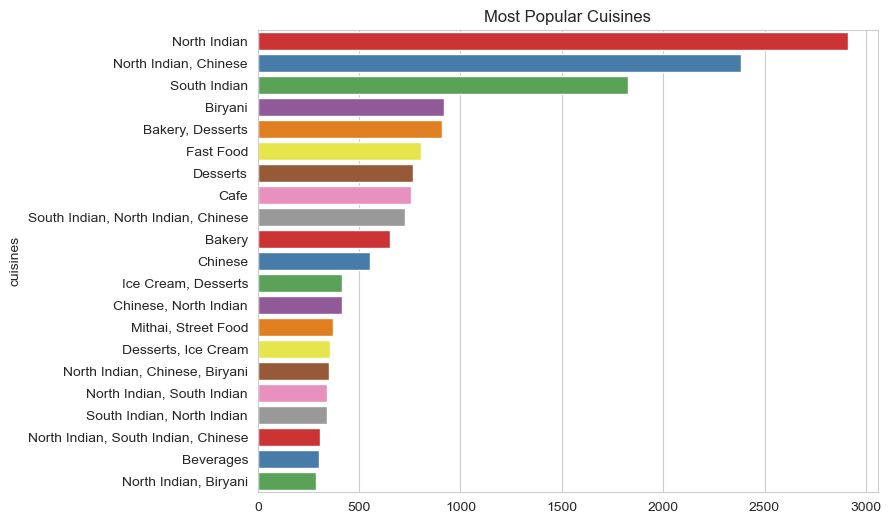

In [55]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x=cuisines_count,y=cuisines,orient='h',hue=cuisines,palette='Set1')
plt.title("Most Popular Cuisines")
plt.show()

* The Most Popular Restaurant Category in Banglore are North Indian,Chinese,South Indian and Biriyani Outlets

#### 11.Distribution of  Restaurant Ratings

In [58]:
rest_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [59]:
rest_data[rest_data['rate']=='NEW']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NEW,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,+91 8553206035,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
110,https://www.zomato.com/bangalore/hari-super-sa...,"594, 24 The Cross BSK, Opposte Oriental Bank, ...",Hari Super Sandwich,No,No,NEW,0,+91 9886722163,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200.0,"[('Rated 1.0', 'RATED\n I have been here many...",[],Delivery,Banashankari
130,https://www.zomato.com/bangalore/roll-magic-fa...,"28, 4th Cross Road, Dwaraka Nagar, Banashankar...",Roll Magic Fast Food,No,No,NEW,0,+91 9731409204,Banashankari,"Takeaway, Delivery",NaN,"Biryani, Rolls, Chinese",200.0,[],[],Delivery,Banashankari
131,https://www.zomato.com/bangalore/foodlieious-m...,"3/16, 22 Main Road, Magenta Block, PES College...",Foodlieious Multi Cuisine,No,No,NEW,0,+91 9168753522\r\n+91 8217877100,Banashankari,Quick Bites,NaN,North Indian,100.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51585,https://www.zomato.com/bangalore/wow-tiffin-fo...,"Near Rama Temple, Immadihalli Road, Whitefield...",Wow Tiffin Food,No,No,NEW,0,+91 9535041209,Whitefield,Quick Bites,NaN,North Indian,200.0,[],[],Dine-out,Whitefield
51586,https://www.zomato.com/bangalore/quick-bites-w...,"119/5, Pattandur Agrahara, Near Brigade Tech p...",Quick Bites,Yes,No,NEW,0,+91 9742377087\n+91 7899303299,Whitefield,Quick Bites,NaN,Chinese,200.0,"[('Rated 5.0', 'RATED\n This is an awesome pl...","['Veg Chowmein + Manchurian', 'Paratha + Chick...",Dine-out,Whitefield
51603,https://www.zomato.com/bangalore/shiv-sagar-1-...,"Shop No 10, Food Court, 2nd Floor, Phoenix Mar...",Shiv sagar,Yes,No,NEW,0,+91 9513300048\n+91 8067266097,Whitefield,"Quick Bites, Food Court",NaN,"South Indian, Chinese, North Indian",250.0,"[('Rated 3.0', 'RATED\n A highly expensive pl...","['Malai Paneer Tikka', 'Paneer Kofta', 'Mushro...",Dine-out,Whitefield
51604,https://www.zomato.com/bangalore/nawab-di-biry...,"17, Thubarahalli Village, Hobli, Varthur Main ...",Nawab Di Biryani,No,No,NEW,0,+91 7899298400\n+91 9818654628,Whitefield,"Takeaway, Delivery",NaN,"Biryani, Mughlai",400.0,"[('Rated 3.0', 'RATED\n Biriyani had ordered ...",[],Dine-out,Whitefield


In [60]:
rest_data['rate'] = rest_data['rate'].str.replace('/5','').replace('NEW',np.nan).replace('-',np.nan).astype('float64')

In [61]:
rest_data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

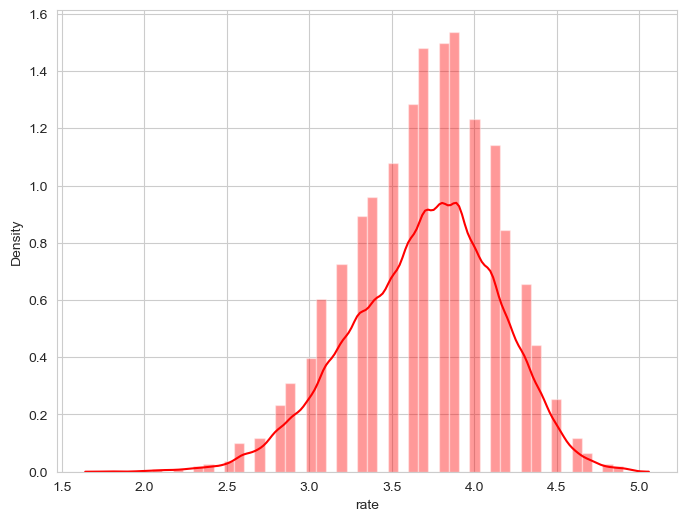

In [62]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(rest_data['rate'],color='red')
plt.show()

In [63]:
rest_data['rate'].mode()

0    3.9
Name: rate, dtype: float64

#### 12.Top Rated Restaurant From Top 20 Restaurant Types

In [65]:
type = rest_data['rest_type'].value_counts().sort_values(ascending=False)[:21].index

In [66]:
rest_data.groupby('rest_type')['rate'].max()

rest_type
Bakery                        4.8
Bakery, Beverage Shop         3.2
Bakery, Cafe                  4.4
Bakery, Dessert Parlor        4.3
Bakery, Food Court            3.2
                             ... 
Sweet Shop                    4.4
Sweet Shop, Dessert Parlor    NaN
Sweet Shop, Quick Bites       4.3
Takeaway                      4.2
Takeaway, Delivery            4.5
Name: rate, Length: 93, dtype: float64

In [67]:
max_rate = rest_data.groupby('rest_type')[['name','rate']].max()

In [68]:
max_rate.filter(items=rest_type,axis=0)

,name,rate
rest_type,,
Quick Bites,repEAT Hub,4.8
Casual Dining,nu.tree,4.9
Cafe,iSpice Resto Cafe,4.6
Delivery,nu.tree,4.6
Dessert Parlor,iFruit Live Ice Creams,4.9
"Takeaway, Delivery",sCoolMeal,4.5
"Casual Dining, Bar",re:cess - Hilton Bangalore Embassy GolfLinks,4.9
Bakery,YummTumm,4.8
Beverage Shop,Zaitoon Lassi Cafe,4.5


#### 13.Relationship Between Rating and Approx Cost(2 People)

<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

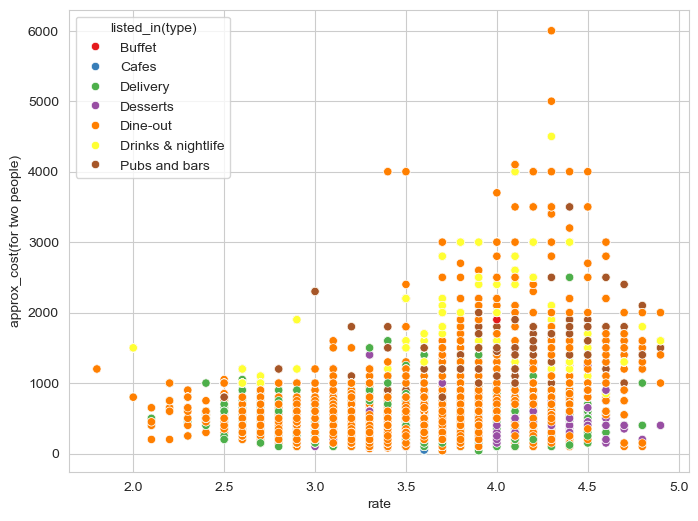

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='rate',y='approx_cost(for two people)',data=rest_data,hue='listed_in(type)',
               palette='Set1')

* No relation 

#### 14.HighLight the Restaurant Frequency on Map.

In [73]:
#!pip install geopy

In [74]:
#!pip install folium

In [75]:
from geopy.geocoders import Nominatim

In [76]:
locations=pd.DataFrame({"Name":rest_data['location'].unique()})
locations['Name'] = locations['Name'].apply(lambda x:"Bangalore "+str(x))
locations

,Name
0,Bangalore Banashankari
1,Bangalore Basavanagudi
2,Bangalore Mysore Road
3,Bangalore Jayanagar
4,Bangalore Kumaraswamy Layout
...,...
89,Bangalore West Bangalore
90,Bangalore Magadi Road
91,Bangalore Yelahanka
92,Bangalore Sahakara Nagar


In [77]:
lat_lon=[]
geolocator = Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [307]:
locations['geo_loc']=lat_lon
locations.head()

,Name,geo_loc
0,Banashankari,"(12.9393328, 77.5539819)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.3674838, 76.6616452)"
3,Jayanagar,"(12.9418488, 77.5868976)"
4,Kumaraswamy Layout,"(12.9067683, 77.5595021)"


In [235]:
locations.to_csv("C:/Users/Administrator/Desktop/Training/EDA/locations.csv")

In [309]:
locations['Name'] = locations['Name'].str.replace(' ','')

In [311]:
locations.head()

,Name,geo_loc
0,Banashankari,"(12.9393328, 77.5539819)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,MysoreRoad,"(12.3674838, 76.6616452)"
3,Jayanagar,"(12.9418488, 77.5868976)"
4,KumaraswamyLayout,"(12.9067683, 77.5595021)"


In [313]:
locations['Name'].values

array(['Banashankari', 'Basavanagudi', 'MysoreRoad', 'Jayanagar',
       'KumaraswamyLayout', 'RajarajeshwariNagar', 'VijayNagar',
       'Uttarahalli', 'JPNagar', 'South', 'CityMarket', 'Nagarbhavi',
       'BannerghattaRoad', 'BTM', 'KanakapuraRoad', 'Bommanahalli', 'nan',
       'CVRamanNagar', 'ElectronicCity', 'HSR', 'Marathahalli',
       'SarjapurRoad', 'WilsonGarden', 'ShantiNagar',
       'Koramangala5thBlock', 'Koramangala8thBlock', 'RichmondRoad',
       'Koramangala7thBlock', 'Jalahalli', 'Koramangala4thBlock',
       'Bellandur', 'Whitefield', 'East', 'OldAirportRoad', 'Indiranagar',
       'Koramangala1stBlock', 'FrazerTown', 'RTNagar', 'MGRoad',
       'BrigadeRoad', 'LavelleRoad', 'ChurchStreet', 'Ulsoor',
       'ResidencyRoad', 'Shivajinagar', 'InfantryRoad', 'St.MarksRoad',
       'CunninghamRoad', 'RaceCourseRoad', 'CommercialStreet',
       'VasanthNagar', 'HBRLayout', 'Domlur', 'Ejipura',
       'JeevanBhimaNagar', 'OldMadrasRoad', 'Malleshwaram',
       'Seshadri

In [319]:
rest_data['location'].value_counts().reset_index()

,location,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [321]:
zomato_locations1 = rest_data['location'].value_counts().reset_index()
zomato_locations1.columns=['Name','count']
zomato_locations1

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [323]:
zomato_locations1.head()

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144


In [325]:
locations.head()

,Name,geo_loc
0,Banashankari,"(12.9393328, 77.5539819)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,MysoreRoad,"(12.3674838, 76.6616452)"
3,Jayanagar,"(12.9418488, 77.5868976)"
4,KumaraswamyLayout,"(12.9067683, 77.5595021)"


In [327]:
locations['Name'].values

array(['Banashankari', 'Basavanagudi', 'MysoreRoad', 'Jayanagar',
       'KumaraswamyLayout', 'RajarajeshwariNagar', 'VijayNagar',
       'Uttarahalli', 'JPNagar', 'South', 'CityMarket', 'Nagarbhavi',
       'BannerghattaRoad', 'BTM', 'KanakapuraRoad', 'Bommanahalli', 'nan',
       'CVRamanNagar', 'ElectronicCity', 'HSR', 'Marathahalli',
       'SarjapurRoad', 'WilsonGarden', 'ShantiNagar',
       'Koramangala5thBlock', 'Koramangala8thBlock', 'RichmondRoad',
       'Koramangala7thBlock', 'Jalahalli', 'Koramangala4thBlock',
       'Bellandur', 'Whitefield', 'East', 'OldAirportRoad', 'Indiranagar',
       'Koramangala1stBlock', 'FrazerTown', 'RTNagar', 'MGRoad',
       'BrigadeRoad', 'LavelleRoad', 'ChurchStreet', 'Ulsoor',
       'ResidencyRoad', 'Shivajinagar', 'InfantryRoad', 'St.MarksRoad',
       'CunninghamRoad', 'RaceCourseRoad', 'CommercialStreet',
       'VasanthNagar', 'HBRLayout', 'Domlur', 'Ejipura',
       'JeevanBhimaNagar', 'OldMadrasRoad', 'Malleshwaram',
       'Seshadri

In [329]:
zomato_locations2 = pd.merge(zomato_locations1,locations, on ='Name',how='outer').dropna()
zomato_locations2

,Name,count,geo_loc
0,BTM,5124.0,"(12.9163603, 77.604733)"
1,Banashankari,906.0,"(12.9393328, 77.5539819)"
2,Banaswadi,664.0,"(13.0058357, 77.6281321)"
5,Basavanagudi,684.0,"(12.9417261, 77.5755021)"
8,Bellandur,1286.0,"(12.93103185, 77.6782471)"
9,Bommanahalli,238.0,"(12.9089453, 77.6239038)"
12,Brookefield,658.0,"(12.96381425, 77.72243691580387)"
25,Domlur,496.0,"(12.9624669, 77.6381958)"
28,Ejipura,439.0,"(12.9427087, 77.6307137)"
35,HSR,2523.0,"(12.90056335, 77.64947470503677)"


In [333]:
import folium
from folium.plugins import HeatMap

In [335]:
basemap = folium.Map(location = [12.97,77.5],control_scale = True,zoom_start = 12)
basemap

In [337]:
lat,long = zip(*np.array(zomato_locations2['geo_loc']))
zomato_locations2['Lat']=lat
zomato_locations2['Long']=long
HeatMap(zomato_locations2[['Lat','Long','count']].values.tolist(),zoom=20).add_to(basemap)

In [339]:
basemap

#### 15.Highlight the region of North Indian Food and South Indian Food 